In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
# import pickle
import requests
import time

In [2]:
platform = 'moodle'
# platform = 'apache'
# platform = 'atlassian'

In [3]:
tordir = '/home/noppadolass/jira_swteam_recommendation'
inputfilepath = {'recast':'features_hitnohit_'+platform+'.csv','haibin':'haibin_feature_hitnohit_'+platform+'.csv'}

In [4]:
csvdf = pd.read_csv(inputfilepath['recast'], index_col=0) # # # # # # @@@ CHANGE INPUT @@@ # # # # # #
csvdf.head()

/home/recast/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,issuekey,issuefamiliarity,skilldiversity,skillcompetency,team_positiveinteration,team_negativeinteration,assignee_team_positiveinteration,assignee_team_negativeinteration,team_assignee_positiveinteration,team_assignee_negativeinteration,numwork,teamrelateness,assignee_teamrelatedness,issuecloseness,componentexperience,projectexperience,groupcontribution,result
0,real_CONTRIB-1061,0.697528,0.916667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.400000,0.333333,0.001998,0.0,0.0,0.315050,Win
1,gen0_CONTRIB-1061,0.497862,0.942029,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.400000,0.333333,0.001998,0.0,1.5,0.219926,NotWin
2,gen1_CONTRIB-1061,0.153128,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001000,0.000999,0.001998,0.0,0.0,0.000000,NotWin
3,gen2_CONTRIB-1061,0.330762,0.866667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.400000,0.333333,0.001998,0.0,12.0,0.248018,NotWin
4,gen3_CONTRIB-1061,0.510335,0.969072,0.0,0.053537,0.039184,0.089317,0.060471,0.089317,0.060471,2.0,0.666667,0.500000,0.500000,0.0,0.5,0.204552,NotWin


In [5]:
csvdf_extra = pd.read_csv(inputfilepath['haibin'], index_col=0) # # # # # # @@@ CHANGE INPUT @@@ # # # # # #
csvdf_extra.drop(['result'], axis=1, inplace=True)
csvdf_extra.head()

/home/recast/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,experience,winexperience,winrate,roleexperience,closeness,connection
0,0.030638,0.033274,0.903284,0.021702,0.500000,0.000000
1,0.262447,0.270668,0.804009,0.057802,0.500000,0.000000
2,0.000213,0.000128,0.500000,0.000367,0.333333,0.000000
3,0.008511,0.009214,0.905371,0.010105,0.500000,0.000000
4,0.500638,0.500384,0.665638,0.311520,1.000000,0.005181


In [6]:
csvdf = pd.concat([csvdf, csvdf_extra], axis=1, sort=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(csvdf.head())

,issuekey,issuefamiliarity,skilldiversity,skillcompetency,team_positiveinteration,team_negativeinteration,assignee_team_positiveinteration,assignee_team_negativeinteration,team_assignee_positiveinteration,team_assignee_negativeinteration,numwork,teamrelateness,assignee_teamrelatedness,issuecloseness,componentexperience,projectexperience,groupcontribution,result,experience,winexperience,winrate,roleexperience,closeness,connection
0,real_CONTRIB-1061,0.697528,0.916667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.400000,0.333333,0.001998,0.0,0.0,0.315050,Win,0.030638,0.033274,0.903284,0.021702,0.500000,0.000000
1,gen0_CONTRIB-1061,0.497862,0.942029,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.400000,0.333333,0.001998,0.0,1.5,0.219926,NotWin,0.262447,0.270668,0.804009,0.057802,0.500000,0.000000
2,gen1_CONTRIB-1061,0.153128,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001000,0.000999,0.001998,0.0,0.0,0.000000,NotWin,0.000213,0.000128,0.500000,0.000367,0.333333,0.000000
3,gen2_CONTRIB-1061,0.330762,0.866667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.400000,0.333333,0.001998,0.0,12.0,0.248018,NotWin,0.008511,0.009214,0.905371,0.010105,0.500000,0.000000
4,gen3_CONTRIB-1061,0.510335,0.969072,0.0,0.053537,0.039184,0.089317,0.060471,0.089317,0.060471,2.0,0.666667,0.500000,0.500000,0.0,0.5,0.204552,NotWin,0.500638,0.500384,0.665638,0.311520,1.000000,0.005181


In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(csvdf.describe())

,issuefamiliarity,skilldiversity,skillcompetency,team_positiveinteration,team_negativeinteration,assignee_team_positiveinteration,assignee_team_negativeinteration,team_assignee_positiveinteration,team_assignee_negativeinteration,numwork,teamrelateness,assignee_teamrelatedness,issuecloseness,componentexperience,projectexperience,groupcontribution,experience,winexperience,winrate,roleexperience,closeness,connection
count,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06
mean,3.290598e-01,7.093295e-01,3.258745e-01,2.284544e-02,2.092711e-02,1.832837e-02,1.665301e-02,1.832837e-02,1.665301e-02,1.085426e+01,2.989162e-01,2.581814e-01,6.082166e-02,5.272479e+00,3.194853e+02,1.670092e-01,7.519470e-02,7.446315e-02,7.771790e-01,5.648805e-02,5.207030e-01,2.020256e-03
std,1.405532e-01,2.523149e-01,2.664801e-01,4.832980e-02,4.641668e-02,5.084437e-02,4.876288e-02,5.084437e-02,4.876288e-02,5.701562e+01,2.355699e-01,2.039287e-01,3.215861e-01,1.331287e+01,4.523059e+02,6.831027e-02,1.012838e-01,1.011331e-01,1.464635e-01,8.937838e-02,1.373139e-01,9.622841e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.127660e-04,0.000000e+00,0.000000e+00,1.884231e-04,0.000000e+00,0.000000e+00
25%,2.354352e-01,5.511364e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.986560e-03,3.976143e-03,1.998002e-03,0.000000e+00,9.000000e+00,1.240942e-01,3.617021e-03,3.327361e-03,7.020808e-01,2.620618e-03,4.666667e-01,0.000000e+00
50%,3.244013e-01,7.833333e-01,5.000000e-01,6.236613e-03,5.029064e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-01,3.333333e-01,4.998750e-03,7.500000e-01,1.126667e+02,1.623473e-01,3.560284e-02,3.480932e-02,8.080871e-01,1.734084e-02,5.000000e-01,0.000000e+00
75%,4.150191e-01,9.090909e-01,5.000000e-01,2.730288e-02,2.372928e-02,1.484054e-02,1.166145e-02,1.484054e-02,1.166145e-02,2.266667e+00,4.761905e-01,4.166667e-01,6.998834e-03,5.750000e+00,4.638000e+02,2.037004e-01,1.117376e-01,1.093763e-01,8.790749e-01,7.205539e-02,5.666667e-01,5.181347e-04
max,1.000000e+00,9.909910e-01,9.473684e-01,9.940041e-01,9.957428e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.002000e+03,9.936306e-01,9.230769e-01,1.200000e+01,5.830000e+02,4.633000e+03,9.277224e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
dict_normalize = {}
tempcsv=csvdf.select_dtypes(exclude='object')
for column in tempcsv:
    if column =="closeness":
        continue
    if tempcsv[column].min() != 0 or tempcsv[column].max() != 1:
        dict_normalize[column] = {}
        dict_normalize[column]['max'] = tempcsv[column].max()
        dict_normalize[column]['min'] = tempcsv[column].min()
        print(column,"\t", tempcsv[column].min(),"\t",tempcsv[column].max())
        csvdf[column] = (csvdf[column] - csvdf[column].min())/(csvdf[column].max()-csvdf[column].min())
dict_normalize
# pickle.dump(dict_normalize, open(outputfilename['norm'], 'wb')) # # # # # # @@@ CHANGE OUTPUT @@@ # # # # # #

issuefamiliarity 	 0.0 	 1.0000000000000002
skilldiversity 	 0.0 	 0.990990990990991
skillcompetency 	 0.0 	 0.9473684210526316
team_positiveinteration 	 0.0 	 0.994004111753926
team_negativeinteration 	 0.0 	 0.995742758489146
numwork 	 0.0 	 2002.0
teamrelateness 	 0.0 	 0.9936305732484076
assignee_teamrelatedness 	 0.0 	 0.9230769230769232
issuecloseness 	 0.0 	 12.0
componentexperience 	 0.0 	 583.0
projectexperience 	 0.0 	 4633.0
groupcontribution 	 0.0 	 0.9277224115376204
experience 	 0.00021276595744680848 	 1.0
roleexperience 	 0.00018842309681952604 	 1.0


{'issuefamiliarity': {'max': 1.0000000000000002, 'min': 0.0},
 'skilldiversity': {'max': 0.990990990990991, 'min': 0.0},
 'skillcompetency': {'max': 0.9473684210526316, 'min': 0.0},
 'team_positiveinteration': {'max': 0.994004111753926, 'min': 0.0},
 'team_negativeinteration': {'max': 0.995742758489146, 'min': 0.0},
 'numwork': {'max': 2002.0, 'min': 0.0},
 'teamrelateness': {'max': 0.9936305732484076, 'min': 0.0},
 'assignee_teamrelatedness': {'max': 0.9230769230769232, 'min': 0.0},
 'issuecloseness': {'max': 12.0, 'min': 0.0},
 'componentexperience': {'max': 583.0, 'min': 0.0},
 'projectexperience': {'max': 4633.0, 'min': 0.0},
 'groupcontribution': {'max': 0.9277224115376204, 'min': 0.0},
 'experience': {'max': 1.0, 'min': 0.00021276595744680848},
 'roleexperience': {'max': 1.0, 'min': 0.00018842309681952604}}

In [10]:
csvdf.describe()

,issuefamiliarity,skilldiversity,skillcompetency,team_positiveinteration,team_negativeinteration,assignee_team_positiveinteration,assignee_team_negativeinteration,numwork,teamrelateness,assignee_teamrelatedness,issuecloseness,componentexperience,projectexperience,groupcontribution,experience,winexperience,winrate,roleexperience,closeness,connection
count,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06,2.204527e+06
mean,3.290598e-01,7.157779e-01,3.439787e-01,2.298325e-02,2.101658e-02,1.832837e-02,1.665301e-02,5.421706e-03,3.008323e-01,2.796965e-01,5.068472e-03,9.043704e-03,6.895863e-02,1.800207e-01,7.499790e-02,7.446315e-02,7.771790e-01,5.631023e-02,5.207030e-01,2.020256e-03
std,1.405532e-01,2.546087e-01,2.812846e-01,4.862133e-02,4.661513e-02,5.084437e-02,4.876288e-02,2.847933e-02,2.370800e-01,2.209227e-01,2.679885e-02,2.283510e-02,9.762699e-02,7.363223e-02,1.013054e-01,1.011331e-01,1.464635e-01,8.939522e-02,1.373139e-01,9.622841e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.354352e-01,5.561467e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.005705e-03,4.307488e-03,1.665002e-04,0.000000e+00,1.942586e-03,1.337623e-01,3.404980e-03,3.327361e-03,7.020808e-01,2.432653e-03,4.666667e-01,0.000000e+00
50%,3.244013e-01,7.904545e-01,5.277778e-01,6.274233e-03,5.050565e-03,0.000000e+00,0.000000e+00,0.000000e+00,4.025641e-01,3.611111e-01,4.165625e-04,1.286449e-03,2.431830e-02,1.749955e-01,3.539760e-02,3.480932e-02,8.080871e-01,1.715565e-02,5.000000e-01,0.000000e+00
75%,4.150191e-01,9.173554e-01,5.277778e-01,2.746757e-02,2.383074e-02,1.484054e-02,1.166145e-02,1.132201e-03,4.792430e-01,4.513889e-01,5.832361e-04,9.862779e-03,1.001079e-01,2.195704e-01,1.115486e-01,1.093763e-01,8.790749e-01,7.188051e-02,5.666667e-01,5.181347e-04
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
x_df = csvdf.drop(['issuekey','result'], axis=1)
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204527 entries, 0 to 2204526
Data columns (total 20 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   issuefamiliarity                  float64
 1   skilldiversity                    float64
 2   skillcompetency                   float64
 3   team_positiveinteration           float64
 4   team_negativeinteration           float64
 5   assignee_team_positiveinteration  float64
 6   assignee_team_negativeinteration  float64
 7   numwork                           float64
 8   teamrelateness                    float64
 9   assignee_teamrelatedness          float64
 10  issuecloseness                    float64
 11  componentexperience               float64
 12  projectexperience                 float64
 13  groupcontribution                 float64
 14  experience                        float64
 15  winexperience                     float64
 16  winrate                           fl

In [12]:
y_df = csvdf['result'].replace({'Win':1, 'NotWin':0}, inplace=False)
# pd.to_numeric(y_df)
y_df = y_df.astype(np.float16)
y_df

0          1.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2204522    0.0
2204523    0.0
2204524    0.0
2204525    0.0
2204526    0.0
Name: result, Length: 2204527, dtype: float16

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pickle
import openpyxl
from openpyxl.styles import PatternFill, Border, Side, Alignment, Protection, Font

## Report Generator

In [15]:
compileID = 0
model = ["Logistic Regression", "Decision Tree", "Random Forest", "-", "Naive Bayes", "QDA", "Nearest Neighbors", "-", "-", "-", "Neural Net"]
glob_dict = {}

In [16]:
def strTimeList(timeList):
    strList = []
    for x in timeList:
        strListr.append(time.strftime("%H:%M:%S", time.gmtime(m1_cross_time)))
    return strList

In [17]:
fill_model = PatternFill(fill_type='solid', fgColor='92CDDC')
fill_fold = PatternFill(fill_type='solid', fgColor='DCE6F1')
fill_topic = PatternFill(fill_type='solid', fgColor='EBF1DE')

alignment_model = Alignment(horizontal='center')

def genReport():
    wb = openpyxl.Workbook()
    ws = wb.active 
    ws.title = "Report"
    curr_row = 1
    
    for i in modelReport:
        print("Writing... ", model[i-1])
        ws.merge_cells(start_row=curr_row, start_column=1, end_row=curr_row, end_column=5)
        pt_cell = ws.cell(row= curr_row , column = 1)
        pt_cell.value = model[i-1]
        pt_cell.fill = fill_model
        pt_cell.alignment = alignment_model
        curr_row += 1
        for j in range(kf.get_n_splits()):
            # HEADER: FOLD #NUMBER
            ws.merge_cells(start_row=curr_row, start_column=1, end_row=curr_row, end_column=5)
            pt_cell = ws.cell(row= curr_row , column = 1)
            pt_cell.value = "Fold #"+str(j+1)
            pt_cell.fill = fill_fold
            curr_row += 1
            
            ws.cell(row= curr_row , column = 1).value = "Fit Time"
            ws.cell(row= curr_row , column = 2).value = time.strftime("%H:%M:%S", time.gmtime(glob_dict[i]['m_time'][j]))
            curr_row += 1
            ws.cell(row= curr_row , column = 1).value = "TN, FP, FN, TP"
            ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_tn'][j]
            ws.cell(row= curr_row , column = 3).value = glob_dict[i]['m_fp'][j]
            ws.cell(row= curr_row , column = 4).value = glob_dict[i]['m_fn'][j]
            ws.cell(row= curr_row , column = 5).value = glob_dict[i]['m_tp'][j]
            curr_row += 1
            ws.cell(row= curr_row , column = 1).value = "Accuracy"
            ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_accuracy'][j]
            curr_row += 1
            
            ws.cell(row= curr_row , column = 2).value = "Precision"
            ws.cell(row= curr_row , column = 3).value = "Recall"
            ws.cell(row= curr_row , column = 4).value = "F1"
            ws.cell(row= curr_row , column = 5).value = "Support"
            ws.cell(row= curr_row , column = 1).fill = fill_topic
            ws.cell(row= curr_row , column = 2).fill = fill_topic
            ws.cell(row= curr_row , column = 3).fill = fill_topic
            ws.cell(row= curr_row , column = 4).fill = fill_topic
            ws.cell(row= curr_row , column = 5).fill = fill_topic
            curr_row += 1
            ws.cell(row= curr_row , column = 1).value = "0"
            ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_0_prsf'][j]['precision']
            ws.cell(row= curr_row , column = 3).value = glob_dict[i]['m_0_prsf'][j]['recall']
            ws.cell(row= curr_row , column = 4).value = glob_dict[i]['m_0_prsf'][j]['f1-score']
            ws.cell(row= curr_row , column = 5).value = glob_dict[i]['m_0_prsf'][j]['support']
            curr_row += 1
            ws.cell(row= curr_row , column = 1).value = "1"
            ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_1_prsf'][j]['precision']
            ws.cell(row= curr_row , column = 3).value = glob_dict[i]['m_1_prsf'][j]['recall']
            ws.cell(row= curr_row , column = 4).value = glob_dict[i]['m_1_prsf'][j]['f1-score']
            ws.cell(row= curr_row , column = 5).value = glob_dict[i]['m_1_prsf'][j]['support']
            curr_row += 1
            ws.cell(row= curr_row , column = 1).value = "macro"
            ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_macro_prsf'][j]['precision']
            ws.cell(row= curr_row , column = 3).value = glob_dict[i]['m_macro_prsf'][j]['recall']
            ws.cell(row= curr_row , column = 4).value = glob_dict[i]['m_macro_prsf'][j]['f1-score']
            ws.cell(row= curr_row , column = 5).value = glob_dict[i]['m_macro_prsf'][j]['support']
            curr_row += 1
            ws.cell(row= curr_row , column = 1).value = "weight"
            ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_weight_prsf'][j]['precision']
            ws.cell(row= curr_row , column = 3).value = glob_dict[i]['m_weight_prsf'][j]['recall']
            ws.cell(row= curr_row , column = 4).value = glob_dict[i]['m_weight_prsf'][j]['f1-score']
            ws.cell(row= curr_row , column = 5).value = glob_dict[i]['m_weight_prsf'][j]['support']
            curr_row += 1
            ws.merge_cells(start_row=curr_row, start_column=1, end_row=curr_row, end_column=5)
            pt_cell = ws.cell(row= curr_row , column = 1)
            pt_cell.value = "Graph Plot"
            pt_cell.fill = fill_topic
            curr_row += 1
            ws.cell(row= curr_row , column = 1).value = "AUROC"
            ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_auc'][j]
            curr_row += 1
            ws.cell(row= curr_row , column = 1).value = "Avg Precision"
            ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_avgp'][j]
            curr_row += 1
        # HEADER: MODEL SUMMARY
        ws.merge_cells(start_row=curr_row, start_column=1, end_row=curr_row, end_column=5)
        pt_cell = ws.cell(row= curr_row , column = 1)
        pt_cell.value = "MODEL SUMMARY"
        pt_cell.fill = fill_fold
        curr_row += 1
        
        # Re-compute Output
        m_y_pred = glob_dict[i]['m_y_pred']
        m_y_prob = glob_dict[i]['m_y_prob']
        tn, fp, fn, tp = confusion_matrix(y_cross_actual, m_y_pred).ravel()
        output_dict = classification_report(y_cross_actual, m_y_pred, output_dict=True)
        
        # Display Result
        ws.cell(row= curr_row , column = 1).value = "Total Fit Time"
        ws.cell(row= curr_row , column = 2).value = time.strftime("%H:%M:%S", time.gmtime(sum(glob_dict[i]['m_time'])))
        curr_row += 1
        ws.cell(row= curr_row , column = 1).value = "Avg Fit Time"
        ws.cell(row= curr_row , column = 2).value = time.strftime("%H:%M:%S", time.gmtime(sum(glob_dict[i]['m_time'])/kf.get_n_splits()))
        curr_row += 1
        ws.cell(row= curr_row , column = 1).value = "TN, FP, FN, TP"
        ws.cell(row= curr_row , column = 2).value = tn
        ws.cell(row= curr_row , column = 3).value = fp
        ws.cell(row= curr_row , column = 4).value = fn
        ws.cell(row= curr_row , column = 5).value = tp
        curr_row += 1
        ws.cell(row= curr_row , column = 1).value = "Accuracy"
        ws.cell(row= curr_row , column = 2).value = output_dict['accuracy']
        curr_row += 1
        ws.cell(row= curr_row , column = 2).value = "Precision"
        ws.cell(row= curr_row , column = 3).value = "Recall"
        ws.cell(row= curr_row , column = 4).value = "F1"
        ws.cell(row= curr_row , column = 5).value = "Support"
        ws.cell(row= curr_row , column = 1).fill = fill_topic
        ws.cell(row= curr_row , column = 2).fill = fill_topic
        ws.cell(row= curr_row , column = 3).fill = fill_topic
        ws.cell(row= curr_row , column = 4).fill = fill_topic
        ws.cell(row= curr_row , column = 5).fill = fill_topic
        curr_row += 1
        ws.cell(row= curr_row , column = 1).value = "0"
        ws.cell(row= curr_row , column = 2).value = output_dict['0.0']['precision']
        ws.cell(row= curr_row , column = 3).value = output_dict['0.0']['recall']
        ws.cell(row= curr_row , column = 4).value = output_dict['0.0']['f1-score']
        ws.cell(row= curr_row , column = 5).value = output_dict['0.0']['support']
        curr_row += 1
        ws.cell(row= curr_row , column = 1).value = "1"
        ws.cell(row= curr_row , column = 2).value = output_dict['1.0']['precision']
        ws.cell(row= curr_row , column = 3).value = output_dict['1.0']['recall']
        ws.cell(row= curr_row , column = 4).value = output_dict['1.0']['f1-score']
        ws.cell(row= curr_row , column = 5).value = output_dict['1.0']['support']
        curr_row += 1
        ws.cell(row= curr_row , column = 1).value = "macro"
        ws.cell(row= curr_row , column = 2).value = output_dict['macro avg']['precision']
        ws.cell(row= curr_row , column = 3).value = output_dict['macro avg']['recall']
        ws.cell(row= curr_row , column = 4).value = output_dict['macro avg']['f1-score']
        ws.cell(row= curr_row , column = 5).value = output_dict['macro avg']['support']
        curr_row += 1
        ws.cell(row= curr_row , column = 1).value = "weight"
        ws.cell(row= curr_row , column = 2).value = output_dict['weighted avg']['precision']
        ws.cell(row= curr_row , column = 3).value = output_dict['weighted avg']['recall']
        ws.cell(row= curr_row , column = 4).value = output_dict['weighted avg']['f1-score']
        ws.cell(row= curr_row , column = 5).value = output_dict['weighted avg']['support']
        curr_row += 1
        ws.merge_cells(start_row=curr_row, start_column=1, end_row=curr_row, end_column=5)
        pt_cell = ws.cell(row= curr_row , column = 1)
        pt_cell.value = "Graph Plot"
        pt_cell.fill = fill_topic
        curr_row += 1
        ws.cell(row= curr_row , column = 1).value = "AUROC"
        ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_mean_auc']
        ws.cell(row= curr_row , column = 3).value = "+-"
        ws.cell(row= curr_row , column = 4).value = glob_dict[i]['m_std_auc']
        curr_row += 1
        ws.cell(row= curr_row , column = 1).value = "Average Precision"
        ws.cell(row= curr_row , column = 2).value = glob_dict[i]['m_avg_p']
        curr_row += 1
        curr_row += 1 
    wb.save("report-"+platform+".xlsx") 
    print("Done")
#     AUROC + PR-AUC --> https://stackoverflow.com/a/60732038

In [18]:
modelReport = [
    1, # Logistic Regression
    2, # Decision Tree
    3, # Random Forest
#    4, # -
    5, # Naive Bayes
    6, # QDA
    7, # Nearest Neighbors
#     8, # -
#     9, # -
#     10, # -
    11 # Neural Net
]

# <span style="color:orange">Run Model Here</span>

In [19]:
compileID += 1
kf = KFold(n_splits=10, random_state=23)
y_cross_actual = []
for i, (train_index, test_index) in enumerate(kf.split(x_df)):
    y_res, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    y_cross_actual.append(y_test)
y_cross_actual = np.concatenate(y_cross_actual)
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.family' : 'normal',
#                     'font.weight' : 'bold',
                    'font.size'   : 20})

/home/recast/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### M1- LogisticRegression

TRAIN: [ 440906  440907  440908 ... 2204524 2204525 2204526] TEST: [     0      1      2 ... 440903 440904 440905]


/home/recast/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 25.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [440906 440907 440908 ... 881809 881810 881811]


/home/recast/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 25.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [ 881812  881813  881814 ... 1322714 1322715 1322716]


/home/recast/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 25.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [1322717 1322718 1322719 ... 1763619 1763620 1763621]


/home/recast/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 25.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


TRAIN: [      0       1       2 ... 1763619 1763620 1763621] TEST: [1763622 1763623 1763624 ... 2204524 2204525 2204526]


/home/recast/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 25.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


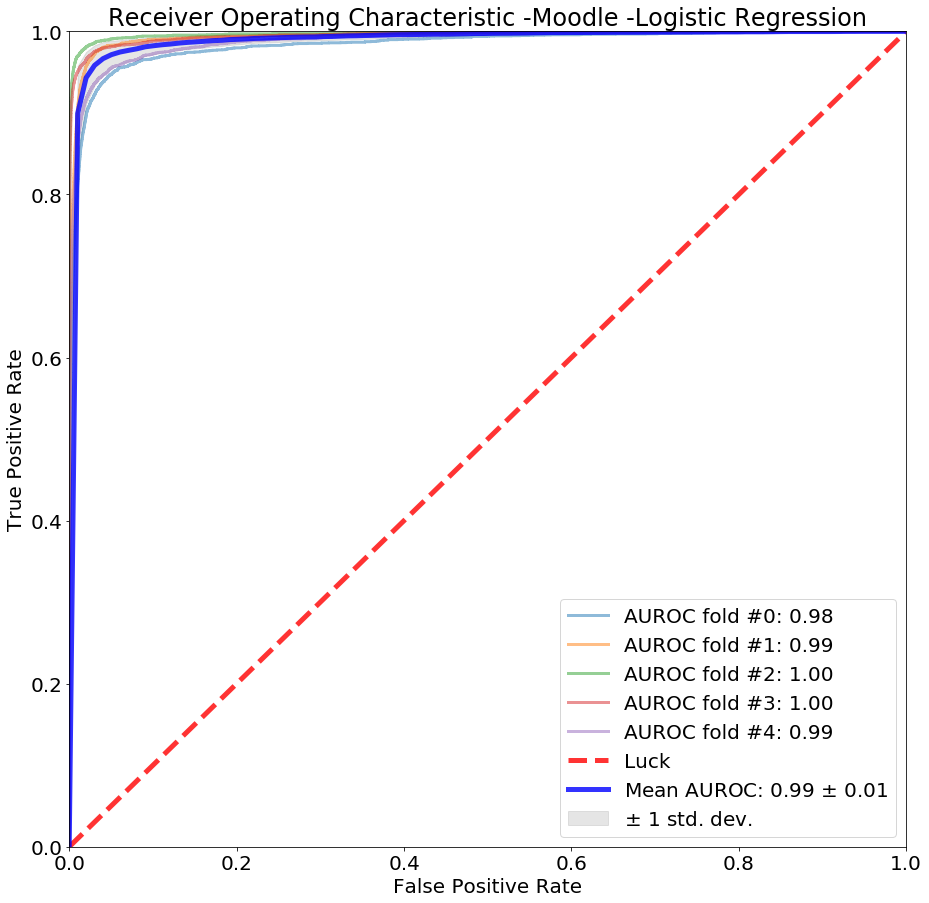

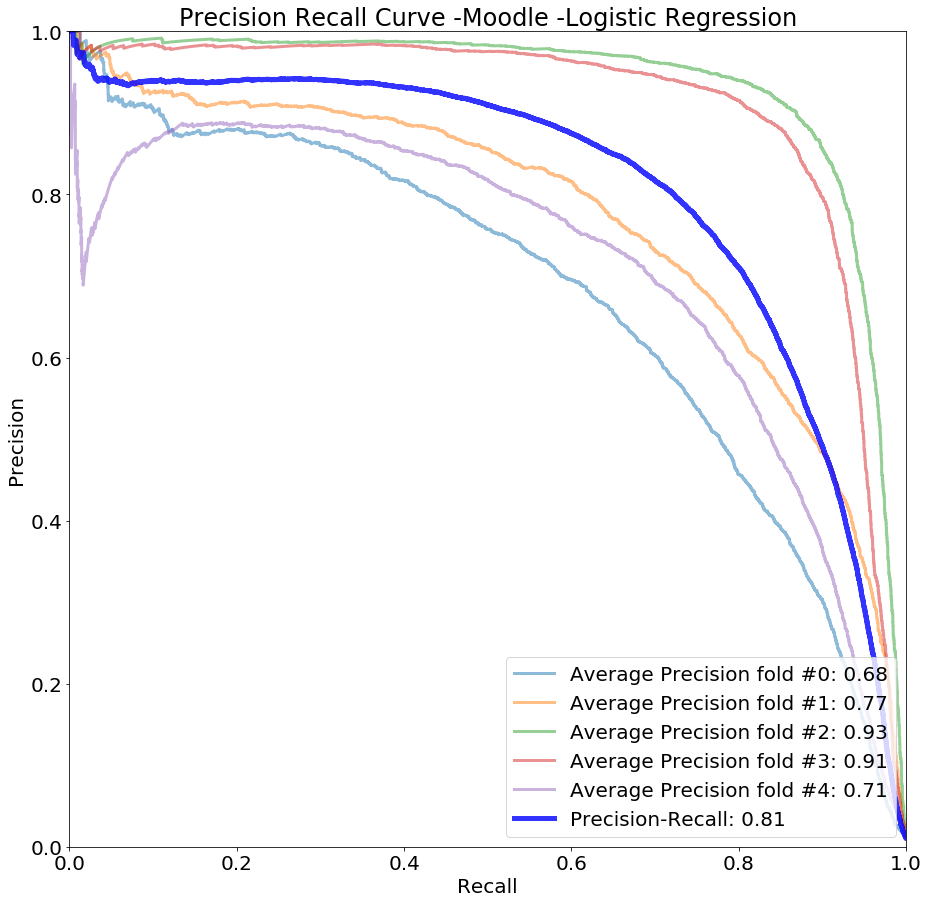

In [20]:
# Fold_DB
m_time = []
m_tn = []
m_fp = []
m_fn = []
m_tp = []
m_accuracy = []
m_0_prsf = []
m_1_prsf = []
m_macro_prsf = []
m_weight_prsf = []
m_auc = []
m_avgp = []

m_ID = compileID
m_start_time = time.time()

# AUC Calculation Variable
tprs = []
mean_fpr = np.linspace(0, 1, 100)
m_y_pred = []
m_y_prob = []

plt.figure(1)
plt.figure(2) 

for i, (train_index, test_index) in enumerate(kf.split(x_df)):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_res, x_test = x_df.iloc[train_index], x_df.iloc[test_index]
    y_res, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    
    # Training
    start_time = time.time()
    m1 = LogisticRegression(solver='liblinear', max_iter=200, class_weight='balanced',n_jobs=25).fit(x_res, y_res)
    end_time = time.time()
    
    # Predict & Keep Result
    m_pred = m1.predict(x_test)
    probs = m1.predict_proba(x_test)
    preds = probs[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, m_pred).ravel()
    output_dict = classification_report(y_test, m_pred, output_dict=True)
    
    m_time.append(end_time - start_time)
    m_tn.append(tn)
    m_fp.append(fp)
    m_fn.append(fn)
    m_tp.append(tp)
    m_accuracy.append(output_dict['accuracy'])
    m_0_prsf.append(output_dict['0.0'])
    m_1_prsf.append(output_dict['1.0'])
    m_macro_prsf.append(output_dict['macro avg'])
    m_weight_prsf.append(output_dict['weighted avg'])
    
    # ROC
    plt.figure(1)
    fpr, tpr, threshold = roc_curve(y_test, preds)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    m_auc.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=0.5, label = 'AUROC fold #%d: %0.2f' % (i, roc_auc))
    
    # PR
    plt.figure(2)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    m_y_pred.append(m_pred)
    m_y_prob.append(preds)
    avg_p = average_precision_score(y_test, preds)
    m_avgp.append(avg_p)
    plt.plot(recall, precision, lw=3, alpha=0.5, label = 'Average Precision fold #%d: %0.2f' % (i, avg_p))

# End Loop
m_cross_time = time.time() - m_start_time
m_y_pred = np.concatenate(m_y_pred)
m_y_prob = np.concatenate(m_y_prob)
             
# Save Graph 
plt.figure(1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
m_mean_auc = auc(mean_fpr, mean_tpr)
m_std_auc = np.std(m_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=5, alpha=.8, color='r', label='Luck')
plt.plot(mean_fpr, mean_tpr, color='b', lw=5, alpha=.8,label=r'Mean AUROC: %0.2f $\pm$ %0.2f' % (m_mean_auc, m_std_auc))
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.title('Receiver Operating Characteristic -'+platform.capitalize()+" -"+model[0])
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('pic/ROC_'+platform+'-'+model[0]+'.png')

plt.figure(2)
precision, recall, thresholds = precision_recall_curve(y_cross_actual, m_y_prob)
m_avg_p = average_precision_score(y_cross_actual, m_y_prob)
plt.plot(recall, precision, color='b', lw=5, alpha=.8, label = 'Precision-Recall: %0.2f' % m_avg_p)
plt.title('Precision Recall Curve -'+platform.capitalize()+" -"+ model[0])
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig('pic/PR_'+platform+'-'+model[0]+'.png')
plt.show()

glob_dict[1] = {'m_time': m_time,
                'm_cross_time': m_cross_time,
                'm_tn': m_tn,
                'm_fp': m_fp,
                'm_fn': m_fn,
                'm_tp': m_tp,
                'm_accuracy': m_accuracy,
                'm_0_prsf': m_0_prsf,
                'm_1_prsf': m_1_prsf,
                'm_macro_prsf': m_macro_prsf,
                'm_weight_prsf': m_weight_prsf,
                'm_auc': m_auc,
                'm_avgp': m_avgp,
                'm_cross_time': m_cross_time,
                'm_y_pred': m_y_pred,
                'm_y_prob': m_y_prob,                
                'm_mean_auc': m_mean_auc,
                'm_std_auc': m_std_auc,
                'm_avg_p': m_avg_p
}

### M2- DecisionTree

TRAIN: [ 440906  440907  440908 ... 2204524 2204525 2204526] TEST: [     0      1      2 ... 440903 440904 440905]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [440906 440907 440908 ... 881809 881810 881811]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [ 881812  881813  881814 ... 1322714 1322715 1322716]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [1322717 1322718 1322719 ... 1763619 1763620 1763621]
TRAIN: [      0       1       2 ... 1763619 1763620 1763621] TEST: [1763622 1763623 1763624 ... 2204524 2204525 2204526]


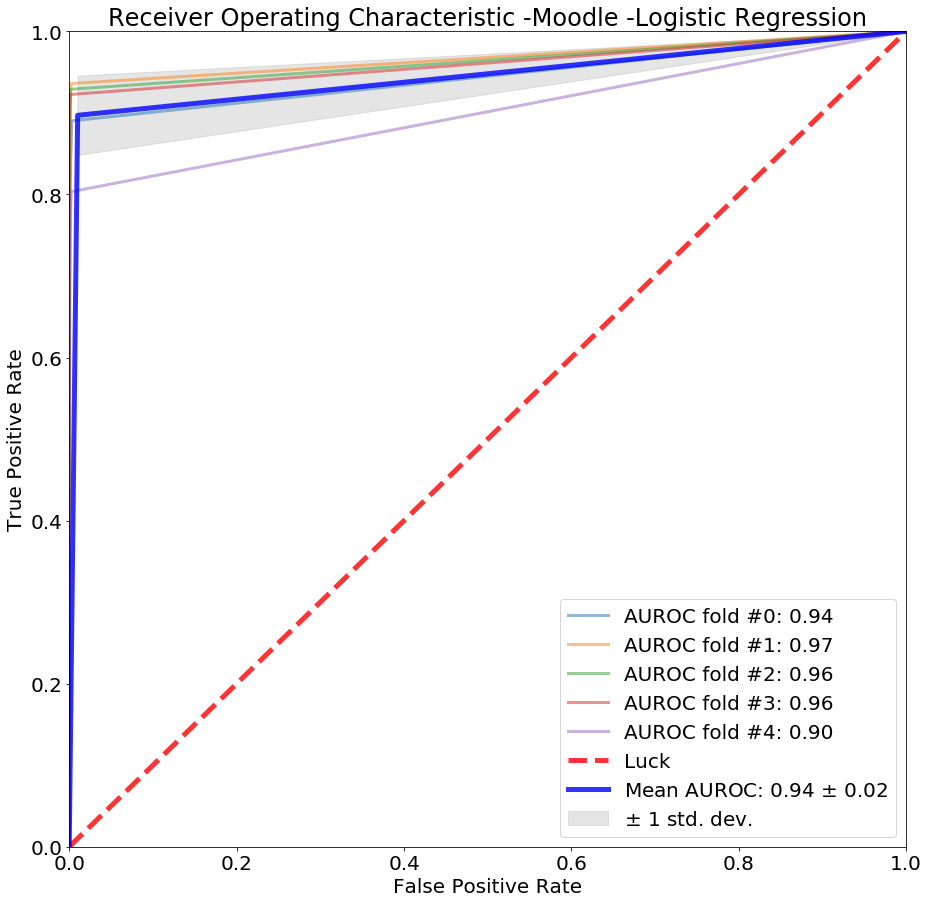

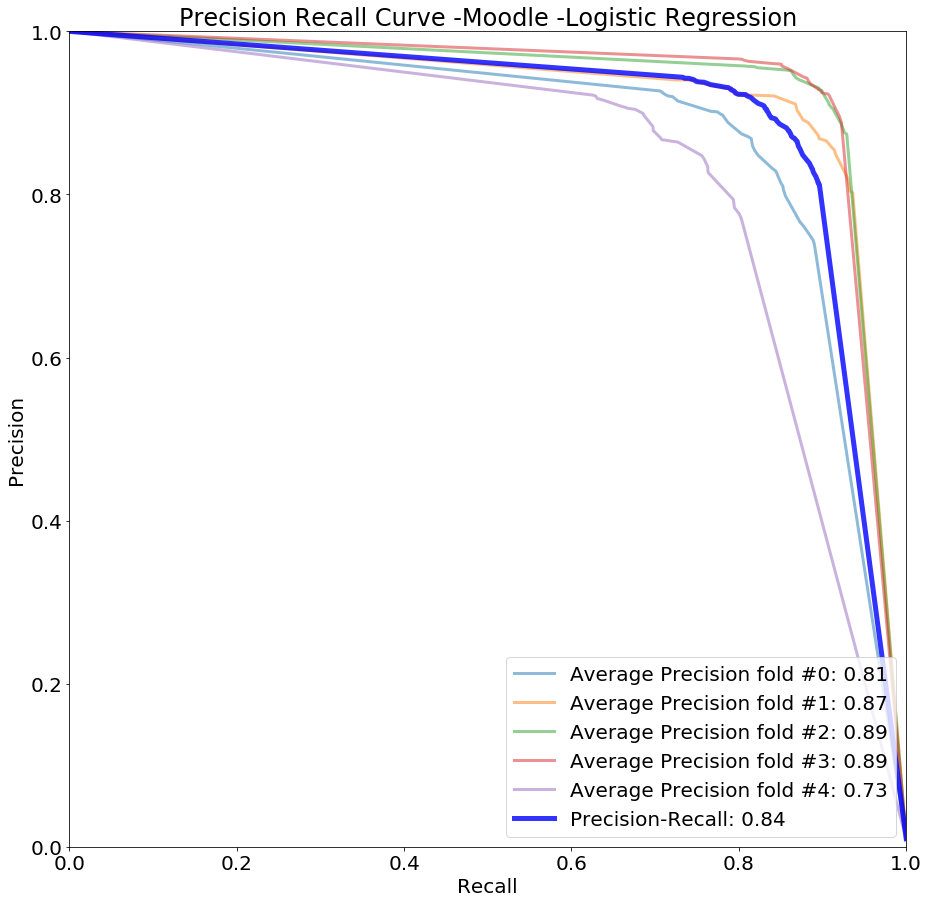

In [21]:
# Fold_DB
m_time = []
m_tn = []
m_fp = []
m_fn = []
m_tp = []
m_accuracy = []
m_0_prsf = []
m_1_prsf = []
m_macro_prsf = []
m_weight_prsf = []
m_auc = []
m_avgp = []

m_ID = compileID
m_start_time = time.time()

# AUC Calculation Variable
tprs = []
mean_fpr = np.linspace(0, 1, 100)
m_y_pred = []
m_y_prob = []

plt.figure(1)
plt.figure(2) 

for i, (train_index, test_index) in enumerate(kf.split(x_df)):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_res, x_test = x_df.iloc[train_index], x_df.iloc[test_index]
    y_res, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    
    # Training
    start_time = time.time()
    m2 = DecisionTreeClassifier(min_samples_leaf=5, class_weight='balanced').fit(x_res, y_res)
    end_time = time.time()
    
    # Predict & Keep Result
    m_pred = m2.predict(x_test)
    probs = m2.predict_proba(x_test)
    preds = probs[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, m_pred).ravel()
    output_dict = classification_report(y_test, m_pred, output_dict=True)
    
    m_time.append(end_time - start_time)
    m_tn.append(tn)
    m_fp.append(fp)
    m_fn.append(fn)
    m_tp.append(tp)
    m_accuracy.append(output_dict['accuracy'])
    m_0_prsf.append(output_dict['0.0'])
    m_1_prsf.append(output_dict['1.0'])
    m_macro_prsf.append(output_dict['macro avg'])
    m_weight_prsf.append(output_dict['weighted avg'])
    
    # ROC
    plt.figure(1)
    fpr, tpr, threshold = roc_curve(y_test, preds)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    m_auc.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=0.5, label = 'AUROC fold #%d: %0.2f' % (i, roc_auc))
    
    # PR
    plt.figure(2)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    m_y_pred.append(m_pred)
    m_y_prob.append(preds)
    avg_p = average_precision_score(y_test, preds)
    m_avgp.append(avg_p)
    plt.plot(recall, precision, lw=3, alpha=0.5, label = 'Average Precision fold #%d: %0.2f' % (i, avg_p))

# End Loop
m_cross_time = time.time() - m_start_time
m_y_pred = np.concatenate(m_y_pred)
m_y_prob = np.concatenate(m_y_prob)
             
# Save Graph 
plt.figure(1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
m_mean_auc = auc(mean_fpr, mean_tpr)
m_std_auc = np.std(m_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=5, alpha=.8, color='r', label='Luck')
plt.plot(mean_fpr, mean_tpr, color='b', lw=5, alpha=.8,label=r'Mean AUROC: %0.2f $\pm$ %0.2f' % (m_mean_auc, m_std_auc))
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.title('Receiver Operating Characteristic -'+platform.capitalize()+" -"+model[0])
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('pic/ROC_'+platform+'-'+model[1]+'.png')

plt.figure(2)
precision, recall, thresholds = precision_recall_curve(y_cross_actual, m_y_prob)
m_avg_p = average_precision_score(y_cross_actual, m_y_prob)
plt.plot(recall, precision, color='b', lw=5, alpha=.8, label = 'Precision-Recall: %0.2f' % m_avg_p)
plt.title('Precision Recall Curve -'+platform.capitalize()+" -"+ model[0])
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig('pic/PR_'+platform+'-'+model[1]+'.png')
plt.show()

glob_dict[2] = {'m_time': m_time,
                'm_cross_time': m_cross_time,
                'm_tn': m_tn,
                'm_fp': m_fp,
                'm_fn': m_fn,
                'm_tp': m_tp,
                'm_accuracy': m_accuracy,
                'm_0_prsf': m_0_prsf,
                'm_1_prsf': m_1_prsf,
                'm_macro_prsf': m_macro_prsf,
                'm_weight_prsf': m_weight_prsf,
                'm_auc': m_auc,
                'm_avgp': m_avgp,
                'm_cross_time': m_cross_time,
                'm_y_pred': m_y_pred,
                'm_y_prob': m_y_prob,                
                'm_mean_auc': m_mean_auc,
                'm_std_auc': m_std_auc,
                'm_avg_p': m_avg_p
}

### M3- RandomForest

TRAIN: [ 440906  440907  440908 ... 2204524 2204525 2204526] TEST: [     0      1      2 ... 440903 440904 440905]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [440906 440907 440908 ... 881809 881810 881811]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [ 881812  881813  881814 ... 1322714 1322715 1322716]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [1322717 1322718 1322719 ... 1763619 1763620 1763621]
TRAIN: [      0       1       2 ... 1763619 1763620 1763621] TEST: [1763622 1763623 1763624 ... 2204524 2204525 2204526]


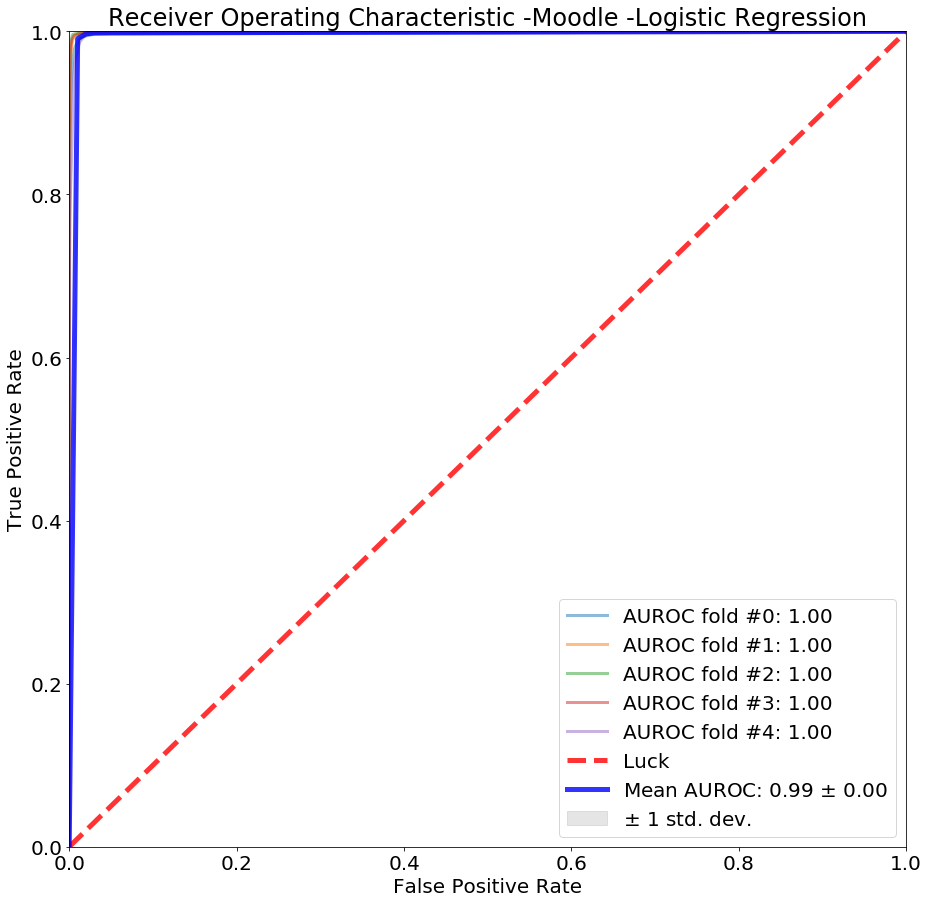

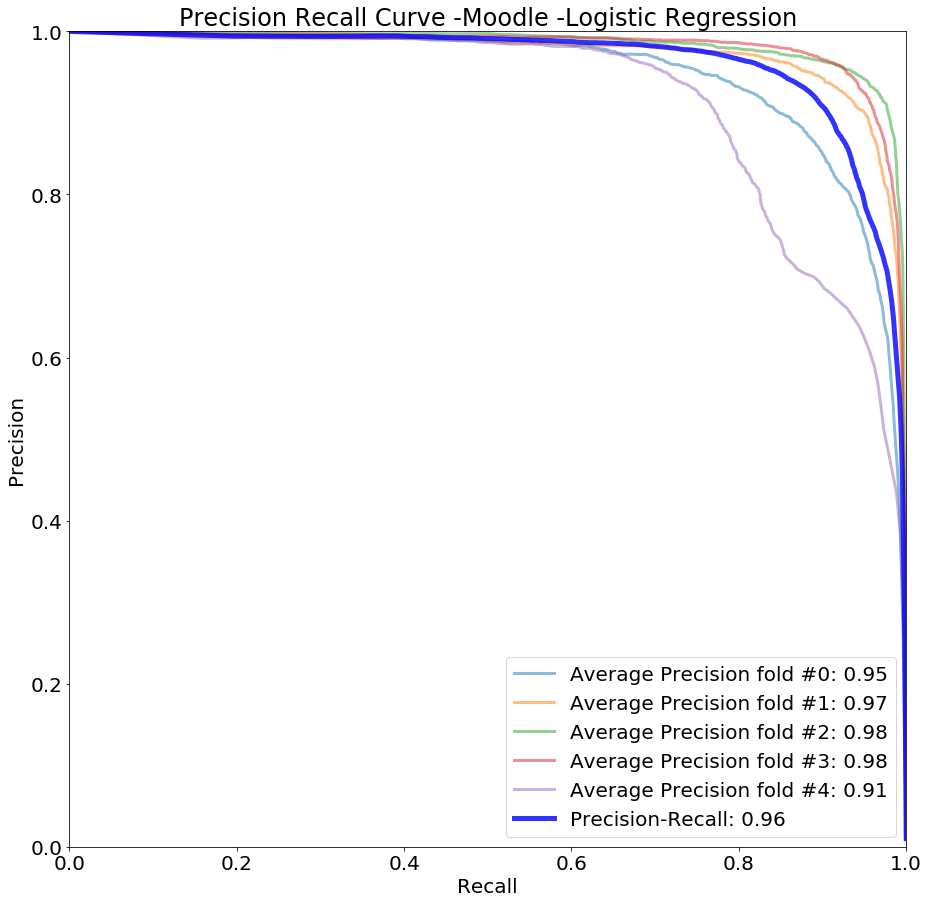

In [22]:
# Fold_DB
m_time = []
m_tn = []
m_fp = []
m_fn = []
m_tp = []
m_accuracy = []
m_0_prsf = []
m_1_prsf = []
m_macro_prsf = []
m_weight_prsf = []
m_auc = []
m_avgp = []

m_ID = compileID
m_start_time = time.time()

# AUC Calculation Variable
tprs = []
mean_fpr = np.linspace(0, 1, 100)
m_y_pred = []
m_y_prob = []

plt.figure(1)
plt.figure(2) 

for i, (train_index, test_index) in enumerate(kf.split(x_df)):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_res, x_test = x_df.iloc[train_index], x_df.iloc[test_index]
    y_res, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    
    # Training
    start_time = time.time()
    m3 = RandomForestClassifier(n_estimators=300, class_weight='balanced',n_jobs=25).fit(x_res, y_res)
    end_time = time.time()
    
    # Predict & Keep Result
    m_pred = m3.predict(x_test)
    probs = m3.predict_proba(x_test)
    preds = probs[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, m_pred).ravel()
    output_dict = classification_report(y_test, m_pred, output_dict=True)
    
    m_time.append(end_time - start_time)
    m_tn.append(tn)
    m_fp.append(fp)
    m_fn.append(fn)
    m_tp.append(tp)
    m_accuracy.append(output_dict['accuracy'])
    m_0_prsf.append(output_dict['0.0'])
    m_1_prsf.append(output_dict['1.0'])
    m_macro_prsf.append(output_dict['macro avg'])
    m_weight_prsf.append(output_dict['weighted avg'])
    
    # ROC
    plt.figure(1)
    fpr, tpr, threshold = roc_curve(y_test, preds)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    m_auc.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=0.5, label = 'AUROC fold #%d: %0.2f' % (i, roc_auc))
    
    # PR
    plt.figure(2)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    m_y_pred.append(m_pred)
    m_y_prob.append(preds)
    avg_p = average_precision_score(y_test, preds)
    m_avgp.append(avg_p)
    plt.plot(recall, precision, lw=3, alpha=0.5, label = 'Average Precision fold #%d: %0.2f' % (i, avg_p))

# End Loop
m_cross_time = time.time() - m_start_time
m_y_pred = np.concatenate(m_y_pred)
m_y_prob = np.concatenate(m_y_prob)
             
# Save Graph 
plt.figure(1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
m_mean_auc = auc(mean_fpr, mean_tpr)
m_std_auc = np.std(m_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=5, alpha=.8, color='r', label='Luck')
plt.plot(mean_fpr, mean_tpr, color='b', lw=5, alpha=.8,label=r'Mean AUROC: %0.2f $\pm$ %0.2f' % (m_mean_auc, m_std_auc))
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.title('Receiver Operating Characteristic -'+platform.capitalize()+" -"+model[0])
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('pic/ROC_'+platform+'-'+model[2]+'.png')

plt.figure(2)
precision, recall, thresholds = precision_recall_curve(y_cross_actual, m_y_prob)
m_avg_p = average_precision_score(y_cross_actual, m_y_prob)
plt.plot(recall, precision, color='b', lw=5, alpha=.8, label = 'Precision-Recall: %0.2f' % m_avg_p)
plt.title('Precision Recall Curve -'+platform.capitalize()+" -"+ model[0])
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig('pic/PR_'+platform+'-'+model[2]+'.png')
plt.show()

glob_dict[3] = {'m_time': m_time,
                'm_cross_time': m_cross_time,
                'm_tn': m_tn,
                'm_fp': m_fp,
                'm_fn': m_fn,
                'm_tp': m_tp,
                'm_accuracy': m_accuracy,
                'm_0_prsf': m_0_prsf,
                'm_1_prsf': m_1_prsf,
                'm_macro_prsf': m_macro_prsf,
                'm_weight_prsf': m_weight_prsf,
                'm_auc': m_auc,
                'm_avgp': m_avgp,
                'm_cross_time': m_cross_time,
                'm_y_pred': m_y_pred,
                'm_y_prob': m_y_prob,                
                'm_mean_auc': m_mean_auc,
                'm_std_auc': m_std_auc,
                'm_avg_p': m_avg_p
}

### M5- Naive Bayes

TRAIN: [ 440906  440907  440908 ... 2204524 2204525 2204526] TEST: [     0      1      2 ... 440903 440904 440905]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [440906 440907 440908 ... 881809 881810 881811]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [ 881812  881813  881814 ... 1322714 1322715 1322716]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [1322717 1322718 1322719 ... 1763619 1763620 1763621]
TRAIN: [      0       1       2 ... 1763619 1763620 1763621] TEST: [1763622 1763623 1763624 ... 2204524 2204525 2204526]


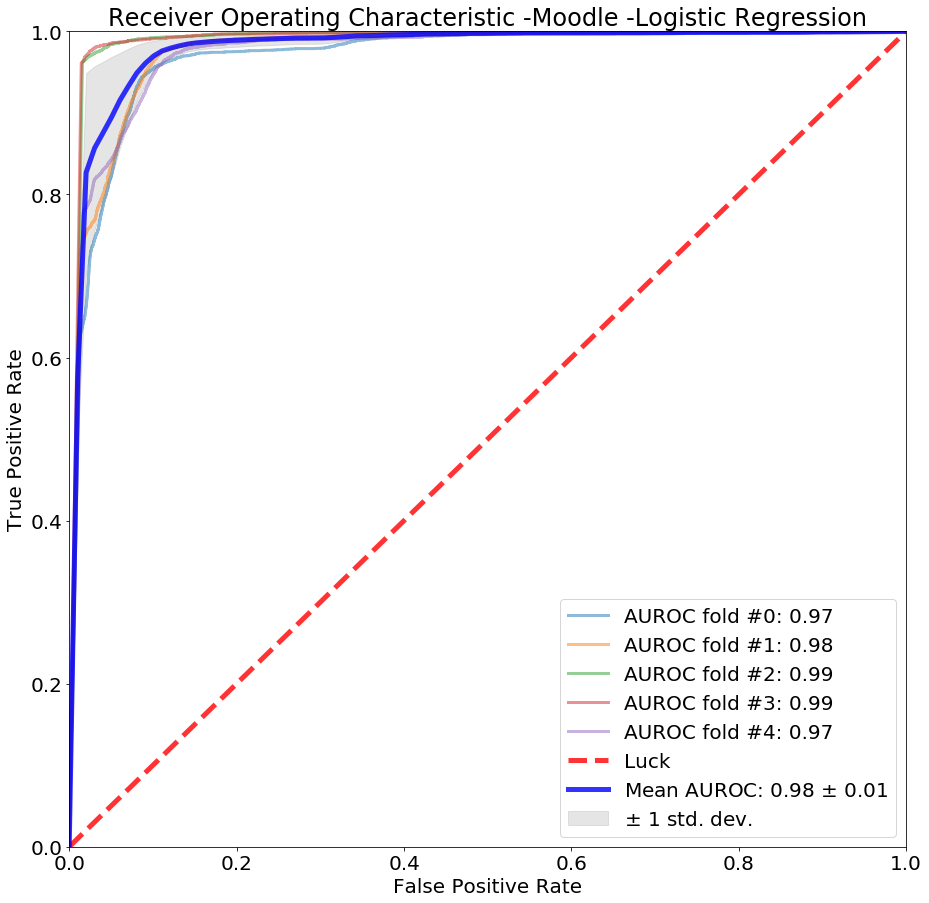

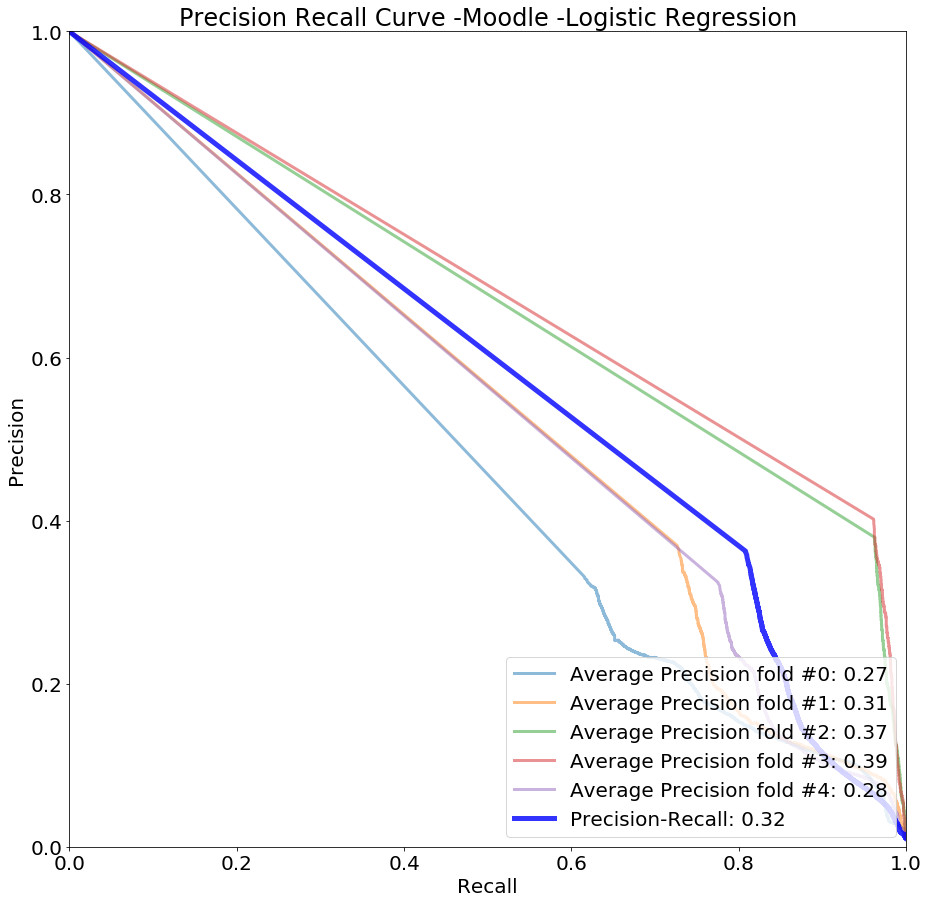

In [24]:
# Fold_DB
m_time = []
m_tn = []
m_fp = []
m_fn = []
m_tp = []
m_accuracy = []
m_0_prsf = []
m_1_prsf = []
m_macro_prsf = []
m_weight_prsf = []
m_auc = []
m_avgp = []

m_ID = compileID
m_start_time = time.time()

# AUC Calculation Variable
tprs = []
mean_fpr = np.linspace(0, 1, 100)
m_y_pred = []
m_y_prob = []

plt.figure(1)
plt.figure(2) 

for i, (train_index, test_index) in enumerate(kf.split(x_df)):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_res, x_test = x_df.iloc[train_index], x_df.iloc[test_index]
    y_res, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    
    # Training
    start_time = time.time()
    m5 = GaussianNB().fit(x_res, y_res)
    end_time = time.time()
    
    # Predict & Keep Result
    m_pred = m5.predict(x_test)
    probs = m5.predict_proba(x_test)
    preds = probs[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, m_pred).ravel()
    output_dict = classification_report(y_test, m_pred, output_dict=True)
    
    m_time.append(end_time - start_time)
    m_tn.append(tn)
    m_fp.append(fp)
    m_fn.append(fn)
    m_tp.append(tp)
    m_accuracy.append(output_dict['accuracy'])
    m_0_prsf.append(output_dict['0.0'])
    m_1_prsf.append(output_dict['1.0'])
    m_macro_prsf.append(output_dict['macro avg'])
    m_weight_prsf.append(output_dict['weighted avg'])
    
    # ROC
    plt.figure(1)
    fpr, tpr, threshold = roc_curve(y_test, preds)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    m_auc.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=0.5, label = 'AUROC fold #%d: %0.2f' % (i, roc_auc))
    
    # PR
    plt.figure(2)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    m_y_pred.append(m_pred)
    m_y_prob.append(preds)
    avg_p = average_precision_score(y_test, preds)
    m_avgp.append(avg_p)
    plt.plot(recall, precision, lw=3, alpha=0.5, label = 'Average Precision fold #%d: %0.2f' % (i, avg_p))

# End Loop
m_cross_time = time.time() - m_start_time
m_y_pred = np.concatenate(m_y_pred)
m_y_prob = np.concatenate(m_y_prob)
             
# Save Graph 
plt.figure(1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
m_mean_auc = auc(mean_fpr, mean_tpr)
m_std_auc = np.std(m_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=5, alpha=.8, color='r', label='Luck')
plt.plot(mean_fpr, mean_tpr, color='b', lw=5, alpha=.8,label=r'Mean AUROC: %0.2f $\pm$ %0.2f' % (m_mean_auc, m_std_auc))
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.title('Receiver Operating Characteristic -'+platform.capitalize()+" -"+model[0])
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('pic/ROC_'+platform+'-'+model[4]+'.png')

plt.figure(2)
precision, recall, thresholds = precision_recall_curve(y_cross_actual, m_y_prob)
m_avg_p = average_precision_score(y_cross_actual, m_y_prob)
plt.plot(recall, precision, color='b', lw=5, alpha=.8, label = 'Precision-Recall: %0.2f' % m_avg_p)
plt.title('Precision Recall Curve -'+platform.capitalize()+" -"+ model[0])
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig('pic/PR_'+platform+'-'+model[4]+'.png')
plt.show()

glob_dict[5] = {'m_time': m_time,
                'm_cross_time': m_cross_time,
                'm_tn': m_tn,
                'm_fp': m_fp,
                'm_fn': m_fn,
                'm_tp': m_tp,
                'm_accuracy': m_accuracy,
                'm_0_prsf': m_0_prsf,
                'm_1_prsf': m_1_prsf,
                'm_macro_prsf': m_macro_prsf,
                'm_weight_prsf': m_weight_prsf,
                'm_auc': m_auc,
                'm_avgp': m_avgp,
                'm_cross_time': m_cross_time,
                'm_y_pred': m_y_pred,
                'm_y_prob': m_y_prob,                
                'm_mean_auc': m_mean_auc,
                'm_std_auc': m_std_auc,
                'm_avg_p': m_avg_p
}

### M6- QDA

TRAIN: [ 440906  440907  440908 ... 2204524 2204525 2204526] TEST: [     0      1      2 ... 440903 440904 440905]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [440906 440907 440908 ... 881809 881810 881811]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [ 881812  881813  881814 ... 1322714 1322715 1322716]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [1322717 1322718 1322719 ... 1763619 1763620 1763621]
TRAIN: [      0       1       2 ... 1763619 1763620 1763621] TEST: [1763622 1763623 1763624 ... 2204524 2204525 2204526]


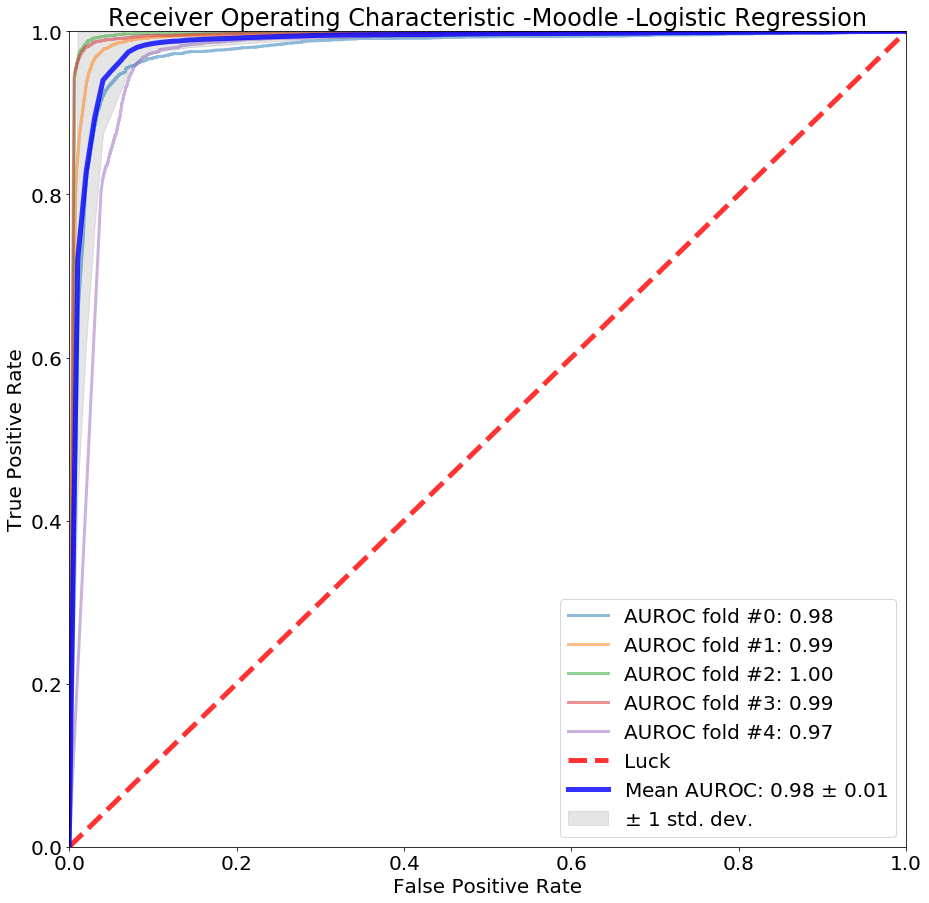

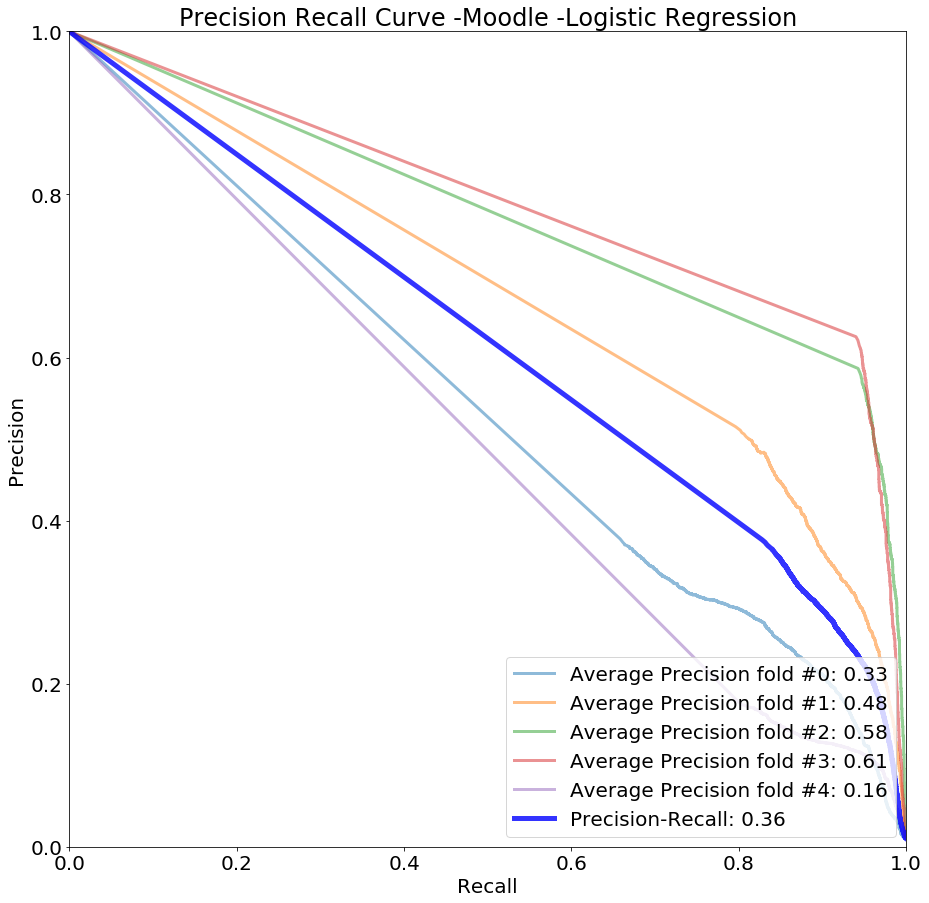

In [25]:

# Fold_DB
m_time = []
m_tn = []
m_fp = []
m_fn = []
m_tp = []
m_accuracy = []
m_0_prsf = []
m_1_prsf = []
m_macro_prsf = []
m_weight_prsf = []
m_auc = []
m_avgp = []

m_ID = compileID
m_start_time = time.time()

# AUC Calculation Variable
tprs = []
mean_fpr = np.linspace(0, 1, 100)
m_y_pred = []
m_y_prob = []

plt.figure(1)
plt.figure(2) 

for i, (train_index, test_index) in enumerate(kf.split(x_df)):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_res, x_test = x_df.iloc[train_index], x_df.iloc[test_index]
    y_res, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    
    # Training
    start_time = time.time()
    m6 = QuadraticDiscriminantAnalysis().fit(x_res, y_res)
    end_time = time.time()
    
    # Predict & Keep Result
    m_pred = m6.predict(x_test)
    probs = m6.predict_proba(x_test)
    preds = probs[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, m_pred).ravel()
    output_dict = classification_report(y_test, m_pred, output_dict=True)
    
    m_time.append(end_time - start_time)
    m_tn.append(tn)
    m_fp.append(fp)
    m_fn.append(fn)
    m_tp.append(tp)
    m_accuracy.append(output_dict['accuracy'])
    m_0_prsf.append(output_dict['0.0'])
    m_1_prsf.append(output_dict['1.0'])
    m_macro_prsf.append(output_dict['macro avg'])
    m_weight_prsf.append(output_dict['weighted avg'])
    
    # ROC
    plt.figure(1)
    fpr, tpr, threshold = roc_curve(y_test, preds)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    m_auc.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=0.5, label = 'AUROC fold #%d: %0.2f' % (i, roc_auc))
    
    # PR
    plt.figure(2)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    m_y_pred.append(m_pred)
    m_y_prob.append(preds)
    avg_p = average_precision_score(y_test, preds)
    m_avgp.append(avg_p)
    plt.plot(recall, precision, lw=3, alpha=0.5, label = 'Average Precision fold #%d: %0.2f' % (i, avg_p))

# End Loop
m_cross_time = time.time() - m_start_time
m_y_pred = np.concatenate(m_y_pred)
m_y_prob = np.concatenate(m_y_prob)
             
# Save Graph 
plt.figure(1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
m_mean_auc = auc(mean_fpr, mean_tpr)
m_std_auc = np.std(m_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=5, alpha=.8, color='r', label='Luck')
plt.plot(mean_fpr, mean_tpr, color='b', lw=5, alpha=.8,label=r'Mean AUROC: %0.2f $\pm$ %0.2f' % (m_mean_auc, m_std_auc))
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.title('Receiver Operating Characteristic -'+platform.capitalize()+" -"+model[0])
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('pic/ROC_'+platform+'-'+model[5]+'.png')

plt.figure(2)
precision, recall, thresholds = precision_recall_curve(y_cross_actual, m_y_prob)
m_avg_p = average_precision_score(y_cross_actual, m_y_prob)
plt.plot(recall, precision, color='b', lw=5, alpha=.8, label = 'Precision-Recall: %0.2f' % m_avg_p)
plt.title('Precision Recall Curve -'+platform.capitalize()+" -"+ model[0])
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig('pic/PR_'+platform+'-'+model[5]+'.png')
plt.show()

glob_dict[6] = {'m_time': m_time,
                'm_cross_time': m_cross_time,
                'm_tn': m_tn,
                'm_fp': m_fp,
                'm_fn': m_fn,
                'm_tp': m_tp,
                'm_accuracy': m_accuracy,
                'm_0_prsf': m_0_prsf,
                'm_1_prsf': m_1_prsf,
                'm_macro_prsf': m_macro_prsf,
                'm_weight_prsf': m_weight_prsf,
                'm_auc': m_auc,
                'm_avgp': m_avgp,
                'm_cross_time': m_cross_time,
                'm_y_pred': m_y_pred,
                'm_y_prob': m_y_prob,                
                'm_mean_auc': m_mean_auc,
                'm_std_auc': m_std_auc,
                'm_avg_p': m_avg_p
}

### M7- Nearest Neighbors

TRAIN: [ 440906  440907  440908 ... 2204524 2204525 2204526] TEST: [     0      1      2 ... 440903 440904 440905]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [440906 440907 440908 ... 881809 881810 881811]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [ 881812  881813  881814 ... 1322714 1322715 1322716]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [1322717 1322718 1322719 ... 1763619 1763620 1763621]
TRAIN: [      0       1       2 ... 1763619 1763620 1763621] TEST: [1763622 1763623 1763624 ... 2204524 2204525 2204526]


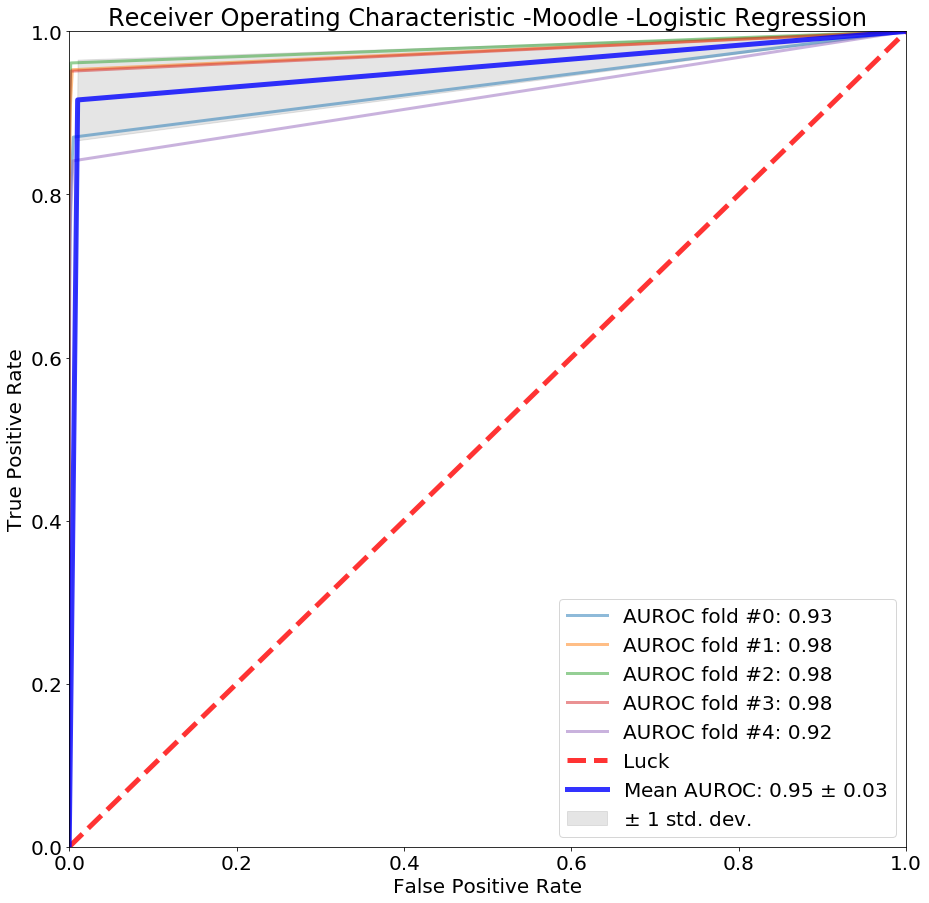

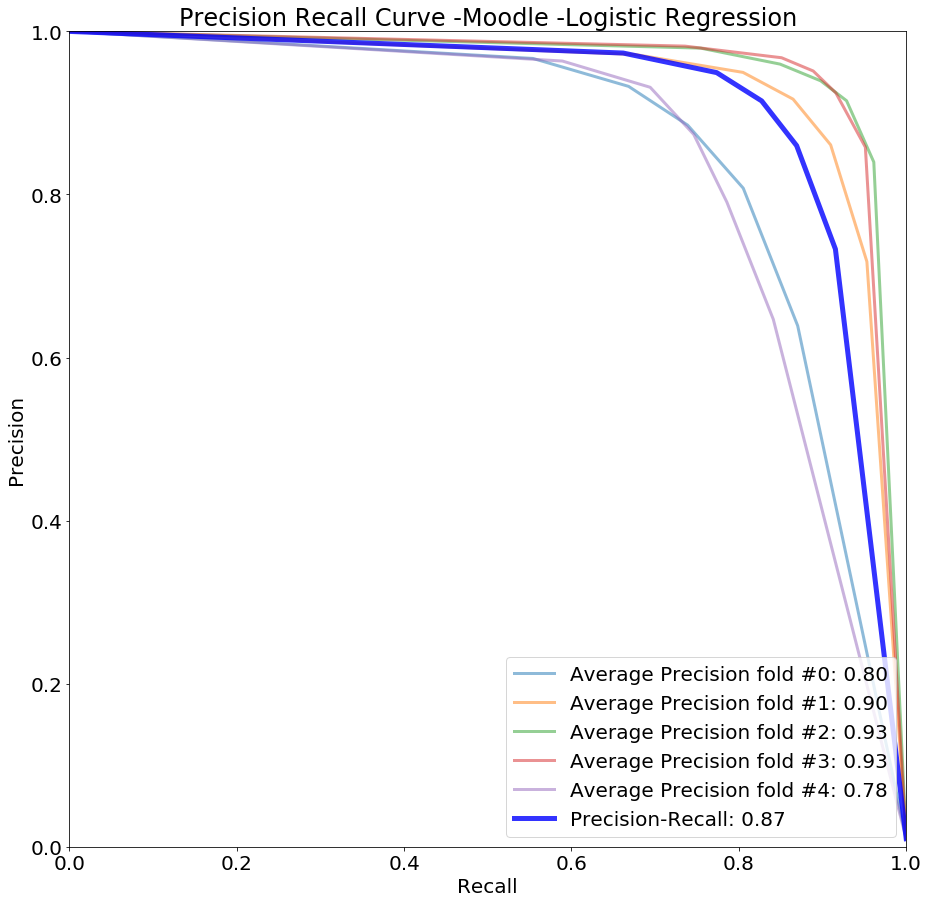

In [26]:
# Fold_DB
m_time = []
m_tn = []
m_fp = []
m_fn = []
m_tp = []
m_accuracy = []
m_0_prsf = []
m_1_prsf = []
m_macro_prsf = []
m_weight_prsf = []
m_auc = []
m_avgp = []

m_ID = compileID
m_start_time = time.time()

# AUC Calculation Variable
tprs = []
mean_fpr = np.linspace(0, 1, 100)
m_y_pred = []
m_y_prob = []

plt.figure(1)
plt.figure(2) 

for i, (train_index, test_index) in enumerate(kf.split(x_df)):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_res, x_test = x_df.iloc[train_index], x_df.iloc[test_index]
    y_res, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    
    # Training
    start_time = time.time()
    m7 = KNeighborsClassifier(5, n_jobs=25).fit(x_res, y_res)
    end_time = time.time()
    
    # Predict & Keep Result
    m_pred = m7.predict(x_test)
    probs = m7.predict_proba(x_test)
    preds = probs[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, m_pred).ravel()
    output_dict = classification_report(y_test, m_pred, output_dict=True)
    
    m_time.append(end_time - start_time)
    m_tn.append(tn)
    m_fp.append(fp)
    m_fn.append(fn)
    m_tp.append(tp)
    m_accuracy.append(output_dict['accuracy'])
    m_0_prsf.append(output_dict['0.0'])
    m_1_prsf.append(output_dict['1.0'])
    m_macro_prsf.append(output_dict['macro avg'])
    m_weight_prsf.append(output_dict['weighted avg'])
    
    # ROC
    plt.figure(1)
    fpr, tpr, threshold = roc_curve(y_test, preds)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    m_auc.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=0.5, label = 'AUROC fold #%d: %0.2f' % (i, roc_auc))
    
    # PR
    plt.figure(2)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    m_y_pred.append(m_pred)
    m_y_prob.append(preds)
    avg_p = average_precision_score(y_test, preds)
    m_avgp.append(avg_p)
    plt.plot(recall, precision, lw=3, alpha=0.5, label = 'Average Precision fold #%d: %0.2f' % (i, avg_p))

# End Loop
m_cross_time = time.time() - m_start_time
m_y_pred = np.concatenate(m_y_pred)
m_y_prob = np.concatenate(m_y_prob)
             
# Save Graph 
plt.figure(1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
m_mean_auc = auc(mean_fpr, mean_tpr)
m_std_auc = np.std(m_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=5, alpha=.8, color='r', label='Luck')
plt.plot(mean_fpr, mean_tpr, color='b', lw=5, alpha=.8,label=r'Mean AUROC: %0.2f $\pm$ %0.2f' % (m_mean_auc, m_std_auc))
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.title('Receiver Operating Characteristic -'+platform.capitalize()+" -"+model[0])
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('pic/ROC_'+platform+'-'+model[6]+'.png')

plt.figure(2)
precision, recall, thresholds = precision_recall_curve(y_cross_actual, m_y_prob)
m_avg_p = average_precision_score(y_cross_actual, m_y_prob)
plt.plot(recall, precision, color='b', lw=5, alpha=.8, label = 'Precision-Recall: %0.2f' % m_avg_p)
plt.title('Precision Recall Curve -'+platform.capitalize()+" -"+ model[0])
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig('pic/PR_'+platform+'-'+model[6]+'.png')
plt.show()

glob_dict[7] = {'m_time': m_time,
                'm_cross_time': m_cross_time,
                'm_tn': m_tn,
                'm_fp': m_fp,
                'm_fn': m_fn,
                'm_tp': m_tp,
                'm_accuracy': m_accuracy,
                'm_0_prsf': m_0_prsf,
                'm_1_prsf': m_1_prsf,
                'm_macro_prsf': m_macro_prsf,
                'm_weight_prsf': m_weight_prsf,
                'm_auc': m_auc,
                'm_avgp': m_avgp,
                'm_cross_time': m_cross_time,
                'm_y_pred': m_y_pred,
                'm_y_prob': m_y_prob,                
                'm_mean_auc': m_mean_auc,
                'm_std_auc': m_std_auc,
                'm_avg_p': m_avg_p
}

### M11- Neural Net

TRAIN: [ 440906  440907  440908 ... 2204524 2204525 2204526] TEST: [     0      1      2 ... 440903 440904 440905]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [440906 440907 440908 ... 881809 881810 881811]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [ 881812  881813  881814 ... 1322714 1322715 1322716]
TRAIN: [      0       1       2 ... 2204524 2204525 2204526] TEST: [1322717 1322718 1322719 ... 1763619 1763620 1763621]
TRAIN: [      0       1       2 ... 1763619 1763620 1763621] TEST: [1763622 1763623 1763624 ... 2204524 2204525 2204526]


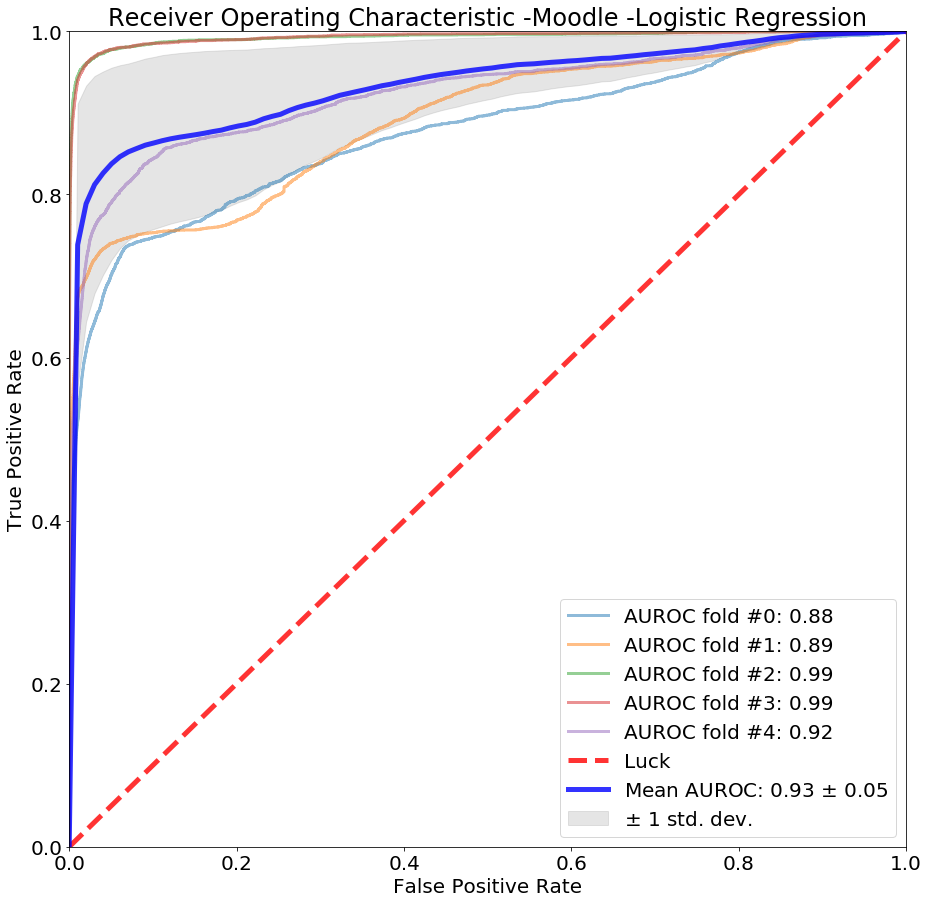

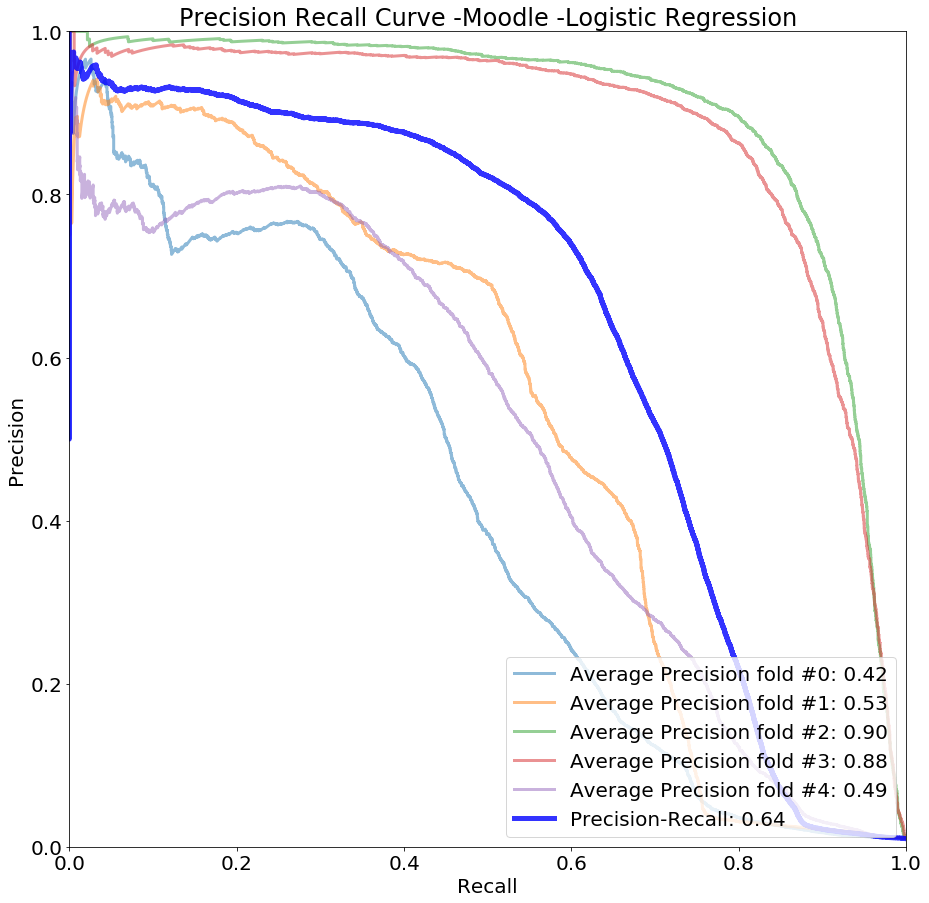

In [29]:

# Fold_DB
m_time = []
m_tn = []
m_fp = []
m_fn = []
m_tp = []
m_accuracy = []
m_0_prsf = []
m_1_prsf = []
m_macro_prsf = []
m_weight_prsf = []
m_auc = []
m_avgp = []

m_ID = compileID
m_start_time = time.time()

# AUC Calculation Variable
tprs = []
mean_fpr = np.linspace(0, 1, 100)
m_y_pred = []
m_y_prob = []

plt.figure(1)
plt.figure(2) 

for i, (train_index, test_index) in enumerate(kf.split(x_df)):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_res, x_test = x_df.iloc[train_index], x_df.iloc[test_index]
    y_res, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    
    # Training
    start_time = time.time()
    m11 = MLPClassifier(alpha=1, max_iter=1000).fit(x_res, y_res)
    end_time = time.time()
    
    # Predict & Keep Result
    m_pred = m11.predict(x_test)
    probs = m11.predict_proba(x_test)
    preds = probs[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, m_pred).ravel()
    output_dict = classification_report(y_test, m_pred, output_dict=True)
    
    m_time.append(end_time - start_time)
    m_tn.append(tn)
    m_fp.append(fp)
    m_fn.append(fn)
    m_tp.append(tp)
    m_accuracy.append(output_dict['accuracy'])
    m_0_prsf.append(output_dict['0.0'])
    m_1_prsf.append(output_dict['1.0'])
    m_macro_prsf.append(output_dict['macro avg'])
    m_weight_prsf.append(output_dict['weighted avg'])
    
    # ROC
    plt.figure(1)
    fpr, tpr, threshold = roc_curve(y_test, preds)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    m_auc.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=0.5, label = 'AUROC fold #%d: %0.2f' % (i, roc_auc))
    
    # PR
    plt.figure(2)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    m_y_pred.append(m_pred)
    m_y_prob.append(preds)
    avg_p = average_precision_score(y_test, preds)
    m_avgp.append(avg_p)
    plt.plot(recall, precision, lw=3, alpha=0.5, label = 'Average Precision fold #%d: %0.2f' % (i, avg_p))

# End Loop
m_cross_time = time.time() - m_start_time
m_y_pred = np.concatenate(m_y_pred)
m_y_prob = np.concatenate(m_y_prob)
             
# Save Graph 
plt.figure(1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
m_mean_auc = auc(mean_fpr, mean_tpr)
m_std_auc = np.std(m_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=5, alpha=.8, color='r', label='Luck')
plt.plot(mean_fpr, mean_tpr, color='b', lw=5, alpha=.8,label=r'Mean AUROC: %0.2f $\pm$ %0.2f' % (m_mean_auc, m_std_auc))
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.title('Receiver Operating Characteristic -'+platform.capitalize()+" -"+model[0])
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('pic/ROC_'+platform+'-'+model[10]+'.png')

plt.figure(2)
precision, recall, thresholds = precision_recall_curve(y_cross_actual, m_y_prob)
m_avg_p = average_precision_score(y_cross_actual, m_y_prob)
plt.plot(recall, precision, color='b', lw=5, alpha=.8, label = 'Precision-Recall: %0.2f' % m_avg_p)
plt.title('Precision Recall Curve -'+platform.capitalize()+" -"+ model[0])
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig('pic/PR_'+platform+'-'+model[10]+'.png')
plt.show()

glob_dict[11] = {'m_time': m_time,
                'm_cross_time': m_cross_time,
                'm_tn': m_tn,
                'm_fp': m_fp,
                'm_fn': m_fn,
                'm_tp': m_tp,
                'm_accuracy': m_accuracy,
                'm_0_prsf': m_0_prsf,
                'm_1_prsf': m_1_prsf,
                'm_macro_prsf': m_macro_prsf,
                'm_weight_prsf': m_weight_prsf,
                'm_auc': m_auc,
                'm_avgp': m_avgp,
                'm_cross_time': m_cross_time,
                'm_y_pred': m_y_pred,
                'm_y_prob': m_y_prob,                
                'm_mean_auc': m_mean_auc,
                'm_std_auc': m_std_auc,
                'm_avg_p': m_avg_p
}

In [30]:
genReport()

Writing...  Logistic Regression
Writing...  Decision Tree
Writing...  Random Forest
Writing...  Naive Bayes
Writing...  QDA
Writing...  Nearest Neighbors
Writing...  Neural Net
Done
